# <center> Wave Equation using Verlet Algorithm in 1D  </center> 


You must have slapped the string of guitar in your life once and saw it's vibration. Well this is the example of a plucked string and the sound you hear is one of the normal mode frequencies. We will model this string in this notebook. Consider a uniform string stretched with a tension T.If we take it's small element $\Delta x$ and find it's equation of motion we get The *Classical Wave Equation* which is a very famous second-order linear partial differential equation.In general second derivative with respect to <i>time</i> is related to second derivative w.r.t <i>space</i>. The equation is -

\begin{align}
\frac{\partial ^2 f}{\partial x^2} = \frac{1}{v^2}\frac{\partial ^2 f}{\partial t^2} 
\end{align}


where v is the speed of the wave. We will solve this wave equation for a $PLUCKED \ \  STRING$. rigidly tightened at both ends.
we will take $v = 1$ and length of the string to be  one for simplicity. 




The problem is as follows:



##### We are given $f(x,t = 0)$ and we need to find out what is $f(x,t)$ subjected to given boundary condition.

We are going to use the Verlet Algorithm in this case. So we just need to  discretize  space coordinate i.e. we will divide the string into N+1 $beads$ (including end points as well) such that $\Delta x = 1/N $. and amplitude of first and last bead is zero i.e. we are opting 

\begin{equation*}
f(0,t) = f(\Delta x N,t) = 0  
\end{equation*}


lets take $f(x,t = 0)$ to be


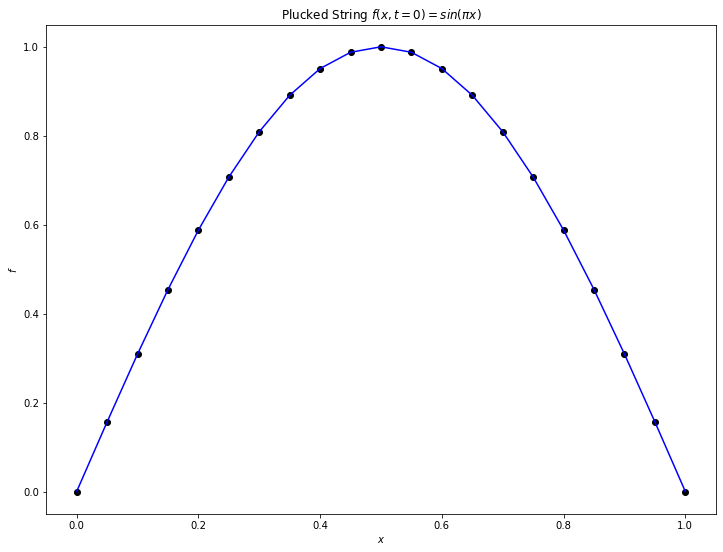

In [1]:
##for pictorial representation of beads
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize  = (12,9))
plt.xlabel(r'$x$')
plt.ylabel(r'$f$')
plt.title(r'Plucked String $f(x,t = 0) = sin(\pi x)$')
N = 20
x = np.linspace(0,1,N+1)
y = np.sin(np.pi*x)

plt.plot(x,y,'b')
plt.scatter(x,y,color = 'k')
plt.show()
           

##### Note :  there are total N-1 beads between the end point. They will evolve only according to eq.(1) and end points will remain fixed . Let's find equation of motion for beads in between



we know from the second derivative central difference formula-

\begin{align}
\frac{\partial ^2}{\partial x^2}f(x_i) = \frac{f(x_i+\Delta x)+f(x_i-\Delta x)-2f(x_i)}{\Delta x^2}
\end{align}

putting in $eq(1)$ and taking $v = 1$ we get 



\begin{align}
\frac{\partial ^2 f(x_i,t)}{\partial t^2} = \frac{f(x_i+\Delta x,t)+f(x_i-\Delta x,t)-2f(x_i,t)}{\Delta x^2}
\end{align}


##### Note that $eq(3)$ is the equation of motion for each bead and that's what we  want. Let's simulate now

as we know the Equation(3) can be written as a coupled first ordered differential equation .i.e. for bead at $i^{th}$ position we can have 


\begin{align}
\frac{\partial  x_i}{\partial t} = v_i
\end{align}

\begin{align}
\frac{\partial  v_i}{\partial t} = \frac{f(x_i+\Delta x)+f(x_i-\Delta x)-2f(x_i)}{\Delta x^2}
\end{align}


Since acceleration of each bead is not dependent upon velocity so we are gonna use our favorite $VERLET \ \ ALGORITHM$

\begin{equation*}
  { x_i }(t+ \Delta t  /2) =   { x_i}(t) +\frac{\Delta t}{2}   { v_i}(t)
\end{equation*}

\begin{equation*}
  { v_i }(t+ \Delta t) =   { v_i}(t) +\Delta t   { a_i}(t+ \Delta t/2)
\end{equation*}

\begin{align*}
  { x_i }(t+ \Delta t) =   { x_i}(t+ \Delta t/2) + \frac{\Delta t}{2} v_i(t+ \Delta t)
\end{align*}

where $a_i$ is given by equation 5.

## How to write code


1. First decide what you want $f(x,t = 0)$ to be !
2. Then after creating x array , calculate dx and define your $dt$ according to Courant  condition which is $\frac{v dt}{dx} \leq 1$
3. Now run a main loop so that in each step you update position of each bead. This will require running second loop within a loop    :')

4. so after every step of a main loop you will have a new position array. You can stack these array vertically or horizontally using np.hstack or np.vstack command 

5. Plot the f(x) vs x within a same graph to see how it evolves

# <center > Python Code </center>



The following program plot the position array at different time instant 

 dt= 0.0024999999999999996


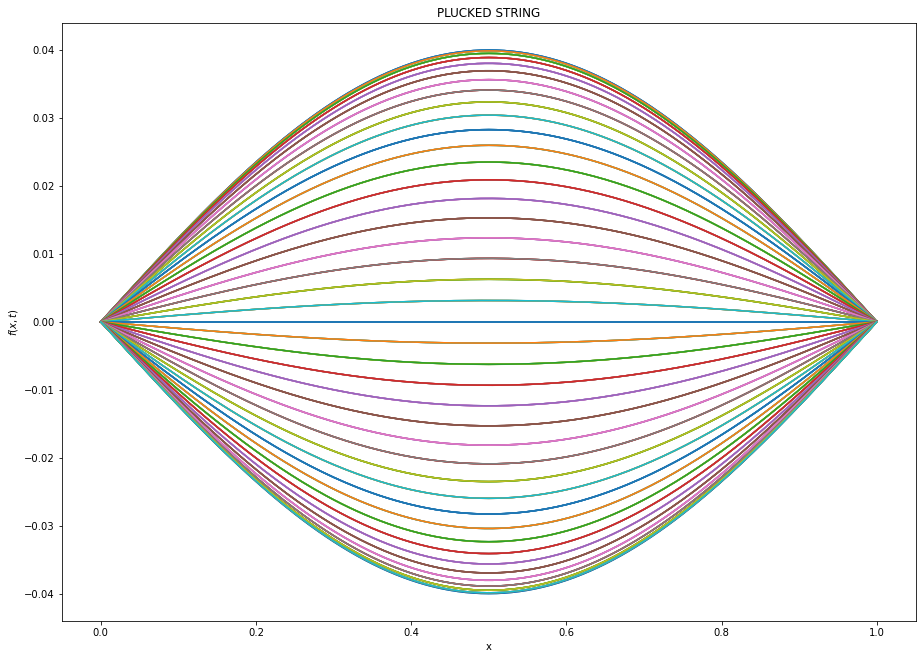

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import math
from IPython.display import display



N = 200 

t = 0.0  ## Initial Time


plt.figure(figsize  = (15,11))
plt.xlabel(r'x')
plt.ylabel(r'$f(x,t)$')
plt.title('PLUCKED STRING')

x = np.linspace(0,1,N+1) ##taking N+1 points

dx = x[3]-x[2]
dt = 0.5*dx
print (' dt=' , dt)

Pos =  0.04*np.sin(np.pi*x)

Axer = np.zeros(N+1)  ## ACCELARATION ARRAY 
Vel = np.zeros(N+1)  ##inital velocity

for l in range(1,N):
    Axer[l] = (1/(dx*dx))*(Pos[l+1]+Pos[l-1]-2*Pos[l])  ##calculating acceleration for each bead

xos = Pos ## This is a array in which i will be stacking the position at differnt instants  

N_iter = 2000   ## iteration number
for i in range(N_iter):
    
    if(i%10==0): ##plotting condition of beads after 10dt. you can change it if you want
        plt.plot(x,Pos)

    Pos= Pos+Vel*dt/2.0  #updating position
    for j2 in range(1,N):    
        Axer[j2]= (1/(dx*dx))*(Pos[j2+1]+Pos[j2-1]-2*Pos[j2]) #updating acceleration
 
  

    Vel =  Vel+Axer*dt ##updating velocity
    Pos= Pos+Vel*dt/2.0  ##updating position again. yeah that's verlet 
    xos = np.vstack((xos,Pos)) ##it contains position of each bead at different instant as a column 

plt.show() 


## Looks Cute no! 

Let's do the simulation now using bqplot (it will not work on colab. You can download this notebook and run this on your computer if you have bqplot library ). Since i stacked the position array in array *xos* (in upper code). I will create a play widget linked with bqplot figure so that it accesses the position at different instant and does the animation  

In [5]:
import bqplot.pyplot as plt
from ipywidgets import*

duration = 10 ### IF YOU WANNA CHANGE ANIMATION DURATION 



plt.figure(animation_duration = duration,layout = {'width':'900px','height':'700px'}) ##creating bqplot figure

plot  = plt.plot(x,x) ## it's a plot function . it's "Y array " value will change in the animation funtion  
plt.ylim(-0.05,0.05)
plt.show()
def animation(n):
    global plot
    plot.y = xos[n,:]
    
w = interactive(animation,n = Play(value = 0,step = 2,min = 0,max = N_iter,interval = duration))    
display(w)

interactive(children=(Play(value=0, description='n', interval=10, max=2000, step=2), Output()), _dom_classes=(…


[![Alt](https://github.com/comphyorg/PDE/blob/master/PLUCKED%20STRING%201D%20WAVE.gif?raw=true)](https://mybinder.org/v2/gh/comphyorg/PDE.git/master?filepath=%2FCWE_CODE.ipynb)


## Run This Code on $\rightarrow$

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/comphyorg/PDE.git/master?filepath=%2FCWE_CODE.ipynb)

##### Note : This badge will directly open notebook in mybinder cloud you have to wait a little and Bqplot simulation will only work in BINDER !


## Wait ! Wait!  How do we know it's true ?

aren't we forgetting something ??

We have to check for Energy conservation Right !!


if density of the string is $\rho$ and tension is $T$ then total energy[1] is given by 

\begin{align}
E = \int_0^1 \frac{1}{2} \rho \bigg ( \frac{\partial f}{\partial t} \bigg)^2 + \frac{1}{2} T  \frac{1}{2} \rho \bigg ( \frac{\partial f}{\partial x} \bigg)^2
\end{align}


we have taken $\rho$ and $T$ = 1  upper integral can be written as sum 


\begin{align}
E = \sum_{i =0}^{N} \frac{1}{2}v_i^2 \Delta x  +\frac{1}{2}\bigg ( \frac{\partial f}{\partial x} \bigg)^2 \Delta x 
\end{align}


now the question comes how do we evaluate $\frac{\partial f}{\partial x}$. it can be found in the following way 


we know 
\begin{align}
f(x+\Delta x) = f(x) +\frac{\partial f}{\partial x} \Delta x
\end{align}


\begin{align}
f(x - \Delta x) = f(x)  - \frac{\partial f}{\partial x} \Delta x
\end{align}




subtracting $eq.(9)$ from  $eq(8)$ gives 


\begin{equation*}
\frac{\partial f}{\partial x} = \frac {f(x + \Delta x) -f(x - \Delta x) }{2\Delta x }
\end{equation*}

and total energy will be 


\begin{align}
E = \sum_{i =0}^{N} \frac{1}{2}v_i^2 \Delta x  +\frac{1}{2}\bigg ( \frac {f(x + \Delta x) -f(x - \Delta x) }{2\Delta x } \bigg)^2 \Delta x 
\end{align}

\begin{align}
E = \sum_{i =0}^{N} \frac{1}{2}v_i^2 \Delta x  + \frac {f(x + \Delta x) -f(x - \Delta x) }{8\Delta x }  
\end{align}


# Code for energy conservation

 dt= 0.0019999999999999996


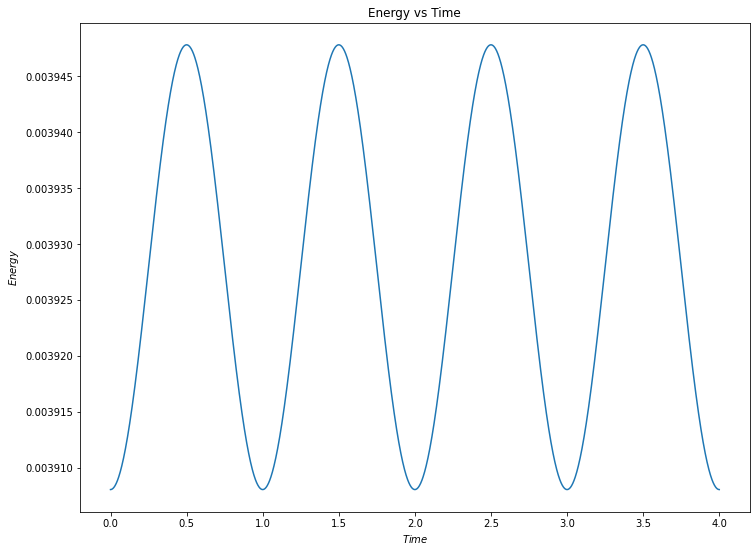

In [13]:
import matplotlib.pyplot as plt
import numpy as np



N = 200 ## total number of beads including end point N+1

t = 0.0  ## Initial Time
Time = [t]

plt.figure(figsize  = (15,11))
plt.xlabel(r'$Time$')
plt.ylabel(r'$Energy$')
plt.title('Energy vs Time')

x = np.linspace(0,1,N+1) ## it contsins end point too

dx = x[3]-x[2]
dt = dx/2.5
print (' dt=' , dt)

Pos =  0.04*np.sin(np.pi*x) ##creating f(x) at t = 0

Axer = np.zeros(N+1)  ## ACCELARATION ARRAY 
Vel = np.zeros(N+1)  ##inital velocity ##initial velocities



E = 0
for l in range(1,N):
    Axer[l] = (1/(dx*dx))*(Pos[l+1]+Pos[l-1]-2*Pos[l]) ##total energy at t = 0

    E+= 0.5*Vel[l]*Vel[l]*dx + ((Pos[l+1]-Pos[l-1])**2)/(8*dx)
Energy = [E] ## energy list


N_iter = 2000
for i in range(N_iter):


    Pos= Pos+Vel*dt/2.0
    for j2 in range(1,N):    
        Axer[j2]= (1/(dx*dx))*(Pos[j2+1]+Pos[j2-1]-2*Pos[j2]) 
    Vel =  Vel+Axer*dt
    Pos= Pos+Vel*dt/2.0
    t +=dt
    E = 0
    for l in range(1, N):   ## calculating total energy
        E+= 0.5*Vel[l]*Vel[l]*dx + ((Pos[l+1]-Pos[l-1])**2)/(8*dx)
    Energy.append(E)    
    Time.append(t) ##Timme list
 

plt.plot(Time,Energy)

plt.show() 



### which is quite good.



# <center> [Stepping Algorithm](https://colab.research.google.com/drive/1NpQSX6byGvv1bgzzJ1SzaBaE4QFYHmvW#scrollTo=dXieytsvCC9g&line=1&uniqifier=1)


This algorithm is obtained when we discretize both time and space co-ordinates in the wave equation. I am writing the final algorithm here. The derivation for finite difference can be found in (Computational Physics by Landau)

we take $v = 1$ and wave equation is 

\begin{align}
\frac{\partial ^2 f}{\partial x^2} = \frac{\partial ^2 f}{\partial t^2} 
\end{align}

The algorithm has two parts 

##### Part 1: First we are given a configuration at $f(x,t = 0)$ to go to next step i.e. to have $f(x,\Delta t)$ we follow

\begin{align}
f(x_i,\Delta t) = f(x_i,0) + \frac{1}{2c^2} \big [ f(x_i+\Delta x ,0)+f(x_i-\Delta x ,0) -2f(x_i,0) \big ]
\end{align}


##### Part 2 : For all next steps following algorithm will be followed:
![Alt](https://github.com/SachinGupta7/IMAGES_and_gifs/blob/master/finite_diff.jpg?raw=true)


\begin{align}
f(x_i,t+\Delta t) = 2f(x_i,t)-2f(x_i,t-\Delta t) + \frac{1}{c^2} \big [ f(x_i+\Delta x ,t)+f(x_i-\Delta x ,t) -2f(x_i,t) \big ]
\end{align}


where $c = \Delta x / \Delta t$ and $c \geq 1$ (Courant Condition) 

## <center> Python Code </center>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1NpQSX6byGvv1bgzzJ1SzaBaE4QFYHmvW#scrollTo=dXieytsvCC9g&line=1&uniqifier=1)

#### lets take a different $f(x,t = 0)$ this time i.e. a triangular wave

100%|█████████████████████████████████████████████████████████████████████████████| 2998/2998 [00:23<00:00, 125.02it/s]


dt =  [0.00066667]


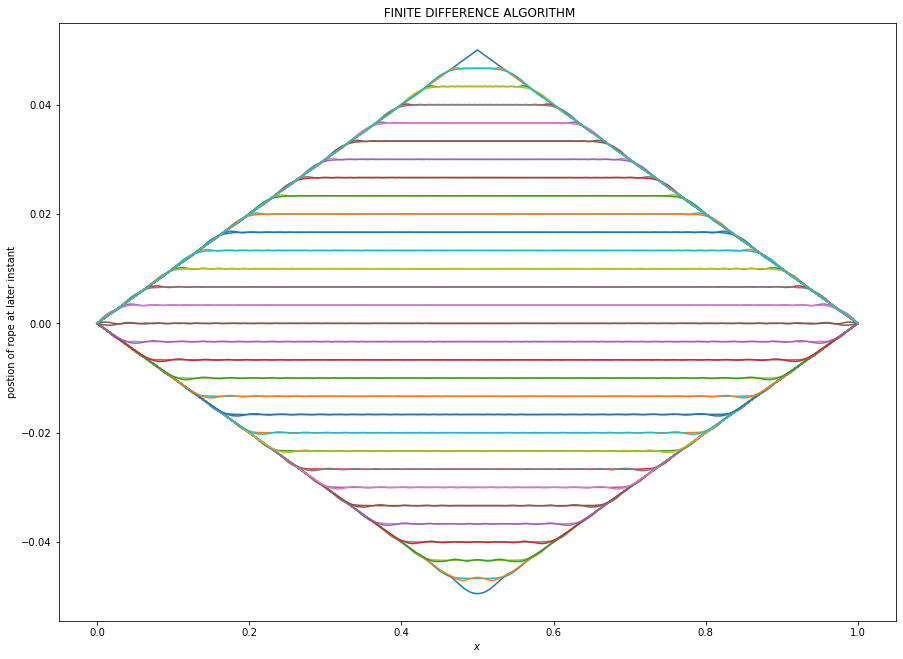

In [5]:
## Initializing and defining $f(x,t = 0)$ 

import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm ##this librarie shows speed of loop



N = 300 ##number of particles
x = np.linspace(0,1,N+1,dtype = float)
x = x.reshape(N+1,1) ## Turning position array into a coulumn vector

## Definiting function for initial shape of  a string i.e. trainugualr
h = 0.05
def f(x):
    if(0.0<x<=0.5):
        y = 2*x*h
    elif (0.5<x<=1.0):
        y = 2*h*(1-x)

    else :
        y = 0
    return y;
dx = x[5]-x[4]
f = np.array([f(x2) for x2 in x],dtype = float).reshape(N+1,1)  ##populating array of f(x,t = 0)



Aaux = np.zeros(N+1) ## This is a pseudo array  that  will store position of next step
A1 = f  ## It will save our position at diiferent instants i.e. stack them

c = 5.
t = 0
dt = dx/c
Time = [t]


## Reaching to first step by equation 13
for q in range(1,N):
    pos = f[q]
  
    pos = pos + (0.5/(c*c))*(f[q+1]+f[q-1]-2*pos) ##updating positions
    t+= dt 
    Time.append(t)
    
    Aaux[q] = pos ##storing them in the pseudo array

    

f = Aaux.reshape(N+1,1)   
A1 = np.hstack((A1,f))  ##stacking the next position of string that was obtained above column wise

Aaux = np.zeros(N+1) ##making it zero so that we can you it again


## For next steps we will be using eq.(14) only


N_it = 3000
for i in tqdm(range(2,N_it)): ##why it starts from 2 ?? well think about it(ansswer lies in the jist of steeping method)
    for j in range(1,N): ##looping through  all positions
        pos = f[j]
        pos = 2*pos-A1[j,(i-2)]+(1./(c*c))*(f[j+1]+f[j-1]-2*pos) #updating position
        Aaux[j] = pos ##storing in auxiliary array

        
    f = Aaux.reshape(N+1,1) ## updating new positions
    A1 = np.hstack((A1,f)) #3stacking them 
    
    Aaux = np.zeros(N+1) ##making it zero so that we can use it again
    t+= dt
    Time.append(t)

    
##plotting the shape of string at different instants    
plt.figure(figsize = (15,11) )  
plt.xlabel (r'$x$')
plt.ylabel('postion of rope at later instant')
plt.title(' FINITE DIFFERENCE ALGORITHM')

for l in range(N_it):
    if(l%50==0): ## This will not plot the f(x) not all the instant, but when l%50==0,
                 ## only those position will be plotted you can change it accordingly
        

        z12 = A1[:,l]  ## Defining array

        plt.plot(x,z12 ) ##plotting


    
print('dt = ',dt)

plt.show()
         

# $ VOILA !!!$

#### Exercise : Check the energy conservation in stepping Algorithm

<u>References</u>:

[1]. The Physics of Vibration and Waves by H. J. Pain


[2]. Computational Physics by Rubin H. Landau, Manuel J Paeg, Christian C. Bordeiana
    